In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create 6 random normally distributed variable, and reshape into 3x2
A = np.reshape(np.random.normal(0, 1, 6), (3, 2))
print(np.linalg.matrix_rank(A))



2


In [227]:
X = np.zeros((3, 500))
for i in range(0, 500):
    v = np.random.normal(0, 1, 2)
    X[:,i] = np.matmul(A,v)
#print(X.shape)

In [68]:
print(np.linalg.matrix_rank(X))

2


In [111]:
u, s, vh = np.linalg.svd(X)
w, v  = np.linalg.eig(np.matmul(X, X.transpose()))

#Left Singular Vectors to eigenvectors
print(u)
print()
print(v)

print()

#Eigenvalues to squared singular values
print(s*s)
print()
print(w)

print()

#energy to sum of squares
print(np.sum(s*s))
print()
print(np.power(np.linalg.norm(X), 2))

[[-0.8288182   0.55701146  0.05290199]
 [-0.22713235 -0.42135399  0.877993  ]
 [ 0.51134263  0.71568083  0.47574118]]

[[ 0.8288182   0.55701146  0.05290199]
 [ 0.22713235 -0.42135399  0.877993  ]
 [-0.51134263  0.71568083  0.47574118]]

[2.96855122e+03 1.90574105e+02 9.75314935e-29]

[2.96855122e+03 1.90574105e+02 1.71763797e-13]

3159.1253301222373

3159.1253301222373


The reason why none of the singular values of X are exactly zero is because of the finite precision of computers. If numbers could be fully represented and not rounded due to the size of data types, then there would be one zero value in the singular values of X.

The left singular vectors of X and the two largest singular values of X represent the significance each of the vectors have towards the colums of A. The sum of the singular vectors multiplied by the singular values will add up to the columns of A.

PCA of Dataset: 
1. Two principal components should be enough to represent this dataset since analyzing the Eigenvalues of X, the third eigenvalue is very close to zero so that last component can be discarded.

2. E[x1] = 0    E[x2] = 0    E[x3] = 0

In [112]:
print(np.average(X[0]))
print(np.average(X[1]))
print(np.average(X[2]))

-0.030933780545583246
-0.016182383091860344
0.033304827131526764


3. 

In [119]:
U = np.array([v[:,0], v[:,1]]).T
print(U)

[[ 0.8288182   0.55701146]
 [ 0.22713235 -0.42135399]
 [-0.51134263  0.71568083]]


In [120]:
xhat = np.matmul(U, np.matmul(U.T, X))
    
print(xhat)

[[-0.91305745  0.77280801  1.04295394 ... -1.32689534  0.52053208
  -2.92009362]
 [ 0.07257113  1.08679517  0.85288551 ... -0.165889    0.21844534
  -0.77291896]
 [-0.03240079 -2.09164496 -1.68999845 ...  0.45370213 -0.46102939
   1.75115429]]


In [121]:
print(np.power(np.linalg.norm(np.subtract(xhat, X)), 2))

3.4362182239130614e-28


4. 

In [132]:
u1 = np.array([v[:,0]]).T
xhatbad = np.matmul(u1, np.matmul(u1.T, X))

In [135]:
print(np.power(np.linalg.norm(np.subtract(xhatbad, X)), 2))
print((s*s)[1])

190.57410545943287
190.57410545943296


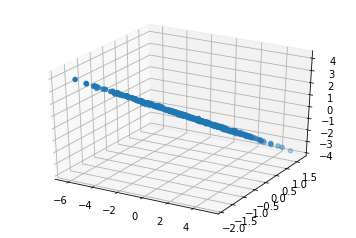

In [152]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[0], X[1], X[2])


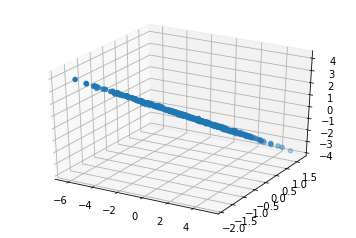

In [153]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(xhat[0], xhat[1], xhat[2])

Dataset #2

1. 

In [200]:
# Create 3 random normally distributed variable
c = np.random.normal(0, 3, 3)

2. 

In [201]:
X2 = np.zeros((3, 500))
for i in range(0, 500):
    v = np.random.normal(0, 1, 2)
    Av = np.matmul(A,v)
    X2[:,i] = np.add(np.matmul(A,v), c)
    
print(np.linalg.matrix_rank(X2))

3


PCA Centering and Dataset #2

1. 

In [228]:
w2, v2  = np.linalg.eig(np.matmul(X2, X2.transpose()))
U2 = np.array([v2[:,0], v2[:,1]]).T

In [229]:
xhat2 = np.matmul(U2, np.matmul(U2.T, X2))

In [230]:
print(np.power(np.linalg.norm(np.subtract(xhat2, X2)), 2))

200.52395639948364


In [231]:
mean = np.array([np.mean(X2, axis=1)]).T
print(mean)

[[ 2.57392287]
 [-6.70670969]
 [-4.5532692 ]]


In [234]:
X2centered = X2 - mean
w2centered, v2centered = np.linalg.eig(np.matmul(X2centered, X2centered.transpose()))
U2centered = np.array([v2centered[:,0], v2centered[:,1]]).T
xhatcentered = np.matmul(U2centered, np.matmul(U2centered.T, X2centered)) + mean
print(np.power(np.linalg.norm(np.subtract(xhatcentered, X2)), 2))

8.791854788688175e-28


Generation of Dataset #3

In [237]:
X3 = np.zeros((3, 500))
for i in range(0, 500):
    v = np.random.normal(0, 1, 2)
    n = np.random.normal(0, .01, 3)
    X3[:,i] = np.add(np.matmul(A,v), n)

In [240]:
X3norm = X3 / np.linalg.norm(X3)

In [241]:
print(np.linalg.matrix_rank(X3norm))
u, s, vh = np.linalg.svd(X3norm)
print(s)

3
[0.96973949 0.2441098  0.00396466]


PCA Denoising of Dataset #3

1. 

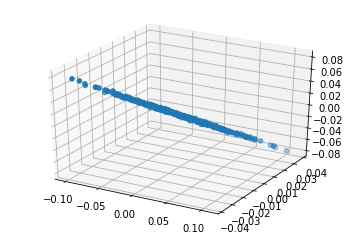

In [242]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X3norm[0], X3norm[1], X3norm[2])

2. 

In [244]:
w, v  = np.linalg.eig(np.matmul(X3norm, X3norm.T))
U = np.array([v[:,0], v[:,1]]).T
X3normhat = np.matmul(U, np.matmul(U.T, X3norm))

In [ ]:
3. 

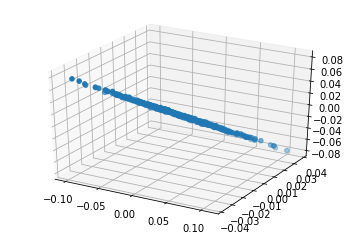

In [245]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X3normhat[0], X3normhat[1], X3normhat[2])

4. 

In [247]:
print(np.power(np.linalg.norm(np.subtract(X3normhat, X3norm)), 2))
print(s[2]*s[2])

1.5718535642344326e-05
1.5718535642344208e-05


Real Data

In [361]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)
images = images.T

1. 

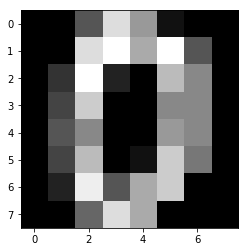

In [362]:
img = np.reshape(images.T[0], (8, 8))
imgplot = plt.imshow(img, cmap='gray')

In [363]:
2. 

2.0

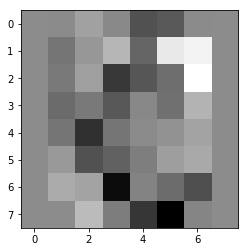

In [370]:
mean = np.array([np.mean(images, axis=1)]).T
imgcent = images - mean
img = np.reshape(imgcent.T[0], (8, 8))
imgplot = plt.imshow(img, cmap='gray')

3. 

0.9053591196887671


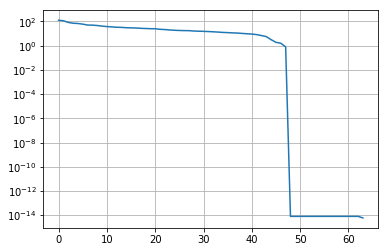

In [365]:
u, s, vh = np.linalg.svd(imgcent)
plt.semilogy(s)
plt.grid(True)

print(np.sum(np.power(s[0:18], 2)) / (np.power(np.linalg.norm(imgcent), 2)))

4. 

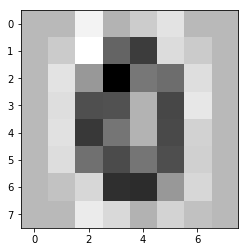

In [366]:
w, v  = np.linalg.eig(np.matmul(imgcent, imgcent.T))
img = np.reshape(v.T[0], (8, 8))
imgplot = plt.imshow(img, cmap='gray')

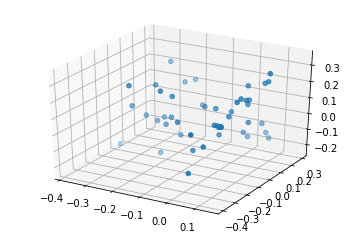

In [367]:
U = np.array([v[:,0], v[:,1], v[:,2]]).T
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(U.T[0], U.T[1], U.T[2])

In [383]:
imgcentnorm = np.matmul(U, np.matmul(U.T, imgcent)) + mean
print(np.power(np.linalg.norm(np.subtract(imgcentnorm, images)), 2))
print(np.sum(np.power(s[3:,], 2)))

36050.01060573711
36050.01060573717


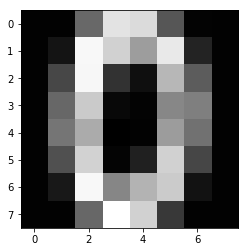

In [375]:
img = np.reshape(imgcentnorm.T[0], (8, 8))
imgplot = plt.imshow(img, cmap='gray')